In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def missing_percentage(df):
    total = df.isna().sum().sort_values(ascending=False)
    total.name = 'Total'
    percent = round(100* (total/len(train)), 2)
    percent.name = 'Percentage'
    x = pd.concat([total, percent], axis=1)
    return x.loc[x['Total']!=0]

def value_count_percentage(df, column):
    
    total = df[column].value_counts(dropna=False).sort_values(ascending=False)
    total.name = 'Total'
    percent = round(100 * df[column].value_counts(dropna=False, normalize=True).sort_values(ascending=False), 2)
    percent.name = 'Percentage'
    return pd.concat([total, percent], axis=1)    

In [3]:
train_file = '../data/counterfeit_train.csv'
test_file = '../data/counterfeit_test.csv'
print(train_file)
print(test_file)

../data/counterfeit_train.csv
../data/counterfeit_test.csv


In [4]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [5]:
train_copied = train.copy()
test_copied = test.copy()

In [6]:
train.shape

(6818, 12)

In [7]:
test.shape

(1705, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          1705 non-null   object 
 1   Counterfeit_Weight   1408 non-null   float64
 2   DistArea_ID          1705 non-null   object 
 3   Active_Since         1705 non-null   int64  
 4   Medicine_MRP         1705 non-null   float64
 5   Medicine_Type        1705 non-null   object 
 6   SidEffect_Level      1705 non-null   object 
 7   Availability_rating  1705 non-null   float64
 8   Area_Type            1705 non-null   object 
 9   Area_City_Type       1705 non-null   object 
 10  Area_dist_level      1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.6+ KB


In [10]:
train.sample(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
6144,FES30,18.650,Area045,2000,98.2830,Mstablizers,critical,0.075979,DownTown,Tier 2,Unknown,1820.7770
2518,TVT11,21.800,Area017,2005,132.6756,Antibiotics,mild,0.049345,DownTown,Tier 2,Unknown,2657.6876
4756,IND15,15.800,Area010,1996,173.9210,MuscleRelaxants,mild,0.045598,MidTownResidential,Tier 3,Unknown,928.6050
4387,MEF73,12.950,Area046,1995,63.2298,Antipyretics,mild,0.187049,DownTown,Tier 1,Small,760.1576
1719,UMX23,18.900,Area013,1985,122.1202,Antimalarial,critical,0.089058,DownTown,Tier 3,High,2138.3636
4563,HWE10,15.450,Area017,2005,49.6138,Analgesics,mild,0.049147,DownTown,Tier 2,Unknown,640.9794
1982,KIT10,20.900,Area035,2002,177.1816,Hreplacements,critical,0.141012,DownTown,Tier 2,Small,1958.5976
4166,EOA13,NaN,Area027,1983,267.0672,Antipyretics,mild,0.043288,CityLimits,Tier 3,Medium,4459.3424
4910,RXK11,22.150,Area018,2007,97.5514,Mstablizers,critical,0.075478,Industrial,Tier 3,Medium,1618.3738
6182,ZRM95,8.705,Area017,2005,216.0296,Antipyretics,mild,0.013000,DownTown,Tier 2,Unknown,4683.0512


In [11]:
test.sample(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
1049,OVU58,15.100,Area018,2007,65.6930,Antipyretics,mild,0.110457,Industrial,Tier 3,Medium
910,CUP12,12.950,Area045,2000,197.6240,Antibiotics,mild,0.053597,DownTown,Tier 2,Unknown
1279,XRY13,19.800,Area046,1995,140.2284,MuscleRelaxants,mild,0.046945,DownTown,Tier 1,Small
1183,XNT10,20.150,Area049,1997,130.6440,Antipyretics,critical,0.081059,DownTown,Tier 1,Medium
1331,ZJZ12,8.220,Area035,2002,73.8852,Antipyretics,mild,0.051447,DownTown,Tier 2,Small
192,KBP10,NaN,Area019,1983,166.1946,Antibiotics,critical,0.089435,MidTownResidential,Tier 1,Small
256,KRS13,7.915,Area035,2002,260.9408,Cardiac,critical,0.104954,DownTown,Tier 2,Small
629,NDQ15,18.300,Area046,1995,134.9362,Antiseptics,mild,0.139244,DownTown,Tier 1,Small
522,ASL20,20.150,Area013,1985,261.1724,Hreplacements,critical,0.151190,DownTown,Tier 3,High
805,NSF70,21.150,Area045,2000,135.5704,Tranquilizers,mild,0.077552,DownTown,Tier 2,Unknown


In [12]:
train.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [13]:
test.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating
count,1408.000000,1705.000000,1705.000000,1705.000000
mean,14.328604,1995.814076,150.857964,0.078963
std,4.616129,8.385310,62.575018,0.052076
min,5.855000,1983.000000,41.590000,0.013000
25%,10.300000,1985.000000,102.880400,0.039831
50%,14.300000,1997.000000,153.715400,0.066693
75%,18.300000,2002.000000,195.389800,0.107220
max,22.650000,2007.000000,277.188400,0.324090


In [14]:
missing_percentage(train)

,Total,Percentage
Counterfeit_Weight,1166,17.1


In [15]:
missing_percentage(test)

,Total,Percentage
Counterfeit_Weight,297,4.36


In [16]:
train.nunique(dropna=False)

Medicine_ID            1557
Counterfeit_Weight      415
DistArea_ID              10
Active_Since              9
Medicine_MRP           5097
Medicine_Type            16
SidEffect_Level           2
Availability_rating    6317
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
dtype: int64

In [17]:
test.nunique(dropna=False)

Medicine_ID            1049
Counterfeit_Weight      326
DistArea_ID              10
Active_Since              9
Medicine_MRP           1580
Medicine_Type            16
SidEffect_Level           2
Availability_rating    1588
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
dtype: int64

## Value counts and Percentage of Categorical Features of Train set

In [18]:
value_count_percentage(train, 'DistArea_ID')

,Total,Percentage
Area017,760,11.15
Area046,749,10.99
Area013,749,10.99
Area035,748,10.97
Area049,739,10.84
Area045,736,10.79
Area027,735,10.78
Area018,729,10.69
Area010,442,6.48
Area019,431,6.32


Categorical : Nominal variable : **DistArea_ID**

there are 10 categories in this feature, and Area010 & Area019 have 4% less sales all other Areas have same % of Sale

In [19]:
value_count_percentage(train, 'Active_Since')

,Total,Percentage
1983,1166,17.10
2005,760,11.15
1985,749,10.99
1995,749,10.99
2002,748,10.97
1997,739,10.84
2000,736,10.79
2007,729,10.69
1996,442,6.48


Categorical : Ordinal Variable : **Active_Since**

there are 9 categories in this features, couterfeit sale is active from 1983 means it has more medicine sale, in other year like 2005, 1985, etc have same sale , but 1996 have only 6.5% sales

In [20]:
value_count_percentage(train,'Medicine_Type')

,Total,Percentage
Hreplacements,976,14.32
Antibiotics,970,14.23
Antiseptics,724,10.62
OralContraceptives,694,10.18
Antipyretics,536,7.86
Cardiac,522,7.66
Mstablizers,514,7.54
Tranquilizers,420,6.16
Analgesics,356,5.22
Antimalarial,339,4.97


Categorical : Nominal Varialble : **Medicine_Type**

* We can see that 14% of sale of Hreplacements & Antibiotics 
* Antiseptics and OralContraceptives around 10-11% of sale 
* that means these medicines are selling more in market and need of these medicines are also more as compared to others

In [21]:
value_count_percentage(train,'SidEffect_Level')

,Total,Percentage
mild,4434,65.03
critical,2384,34.97


Categorical : Ordinal Variable : **SidEffect_Level**

* these counterfeit medicines which 65% medicines have mild side effect and 35% medicines have Critical side effect 

In [22]:
value_count_percentage(train,'Area_Type')

,Total,Percentage
DownTown,4481,65.72
MidTownResidential,873,12.80
CityLimits,735,10.78
Industrial,729,10.69


Categorical : Nominal Variable : **Area_Type**
* In Area type **DownTown** 65% have sold counterfeit medicines

In [23]:
value_count_percentage(train,'Area_City_Type')

,Total,Percentage
Tier 3,2655,38.94
Tier 2,2244,32.91
Tier 1,1919,28.15


Categorical : Ordinal Variable : **Area_City_Type**
* Tier 3 have highest sales around 39% 
* Tier 2 and 3 have 33% & 28% sale 

In [24]:
value_count_percentage(train,'Area_dist_level')

,Total,Percentage
Medium,2203,32.31
Unknown,1938,28.42
Small,1928,28.28
High,749,10.99


Categorical : Ordinal Variable : **Area_dist_level**
* High Area Dist level have lowest sale around 11% 

### Numerical Features 

Numerical : Continous Variable : **Counterfeit_Sales**

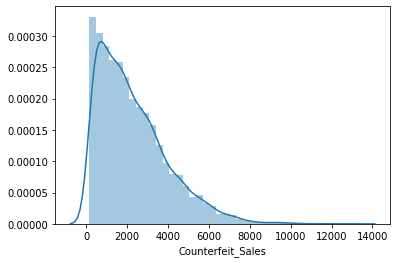

In [25]:
sns.distplot(train['Counterfeit_Sales'], bins=40)
plt.show()

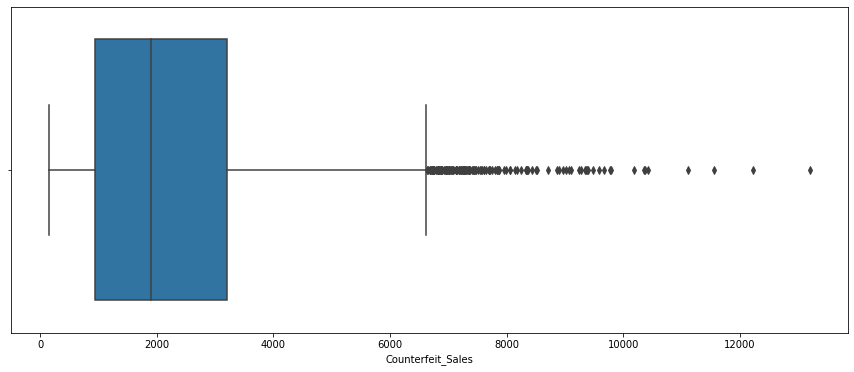

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x=train.Counterfeit_Sales)
plt.show()

In [27]:
train.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='Active_Since', y='Counterfeit_Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='DistArea_ID', y='Counterfeit_Weight',hue='Area_Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='Medicine_Type', y='Counterfeit_Sales', hue='SidEffect_Level')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train.loc[train.Area_Type=='CityLimits', 'Counterfeit_Weight']#.isna().sum()

In [ ]:
for i in train.columns:
#     print(i)
    if train.loc[train.Counterfeit_Weight.isna(),i].nunique(dropna=False) < 10:
        print(i)
        print(train.loc[train.Counterfeit_Weight.isna(),i].unique())

Numerical : Continous Variable : **Counterfeit_Weight**

In [ ]:
sns.distplot(train['Counterfeit_Weight'], bins=40)
plt.show()

Counterfeit_Weight has around 17% missing values and here we seeing that data distribution is uniform and weight range from 5 to 25 units.  highest peak in above plot between 7_10 units 


Numerical : Continuous Variable : **Availability_rating**

In [ ]:
sns.distplot(np.log(train['Availability_rating']).abs())
plt.show()

In [ ]:
sns.distplot(train['Availability_rating'])
# nd_data = np.random.normal(train.Availability_rating.mean(), train.Availability_rating.std(), len(train))
# sns.distplot(nd_data)
plt.show()

Numerical : Continuous Variable : **Medicine_MRP**

In [ ]:
sns.distplot(train['Medicine_MRP'])
plt.show()

In [ ]:
# plt.figure()
train.hist(figsize=(10,20))
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=train.corr(), cmap='viridis')
plt.show()

In [ ]:
for i in train.Medicine_Type.unique():
    print(i)
    print(train.loc[(train.Counterfeit_Weight.notna()) & (train.Medicine_Type == i), 'Counterfeit_Weight'].median())
    train.loc[(train.Counterfeit_Weight.isna()) & (train.Medicine_Type == i), 'Counterfeit_Weight'] = train.loc[(train.Counterfeit_Weight.notna()) & (train.Medicine_Type == i), 'Counterfeit_Weight'].median()
    test.loc[(test.Counterfeit_Weight.isna()) & (test.Medicine_Type == i), 'Counterfeit_Weight'] = test.loc[(test.Counterfeit_Weight.notna()) & (test.Medicine_Type == i), 'Counterfeit_Weight'].median()

In [ ]:
# median_by_med_type = train.loc[train.Counterfeit_Weight.notna()][['Medicine_Type',
#                                                                   'Counterfeit_Weight']].groupby('Medicine_Type').median().reset_index()
# median_by_med_type

In [ ]:
# train.loc[train.Counterfeit_Weight.notna()].groupby('Medicine_Type').mean()

# .agg({'Medicine_Type': 'count'})


In [ ]:
# for i in median_by_med_type.Medicine_Type:
#     print(i)
#     print(train.loc[train.Counterfeit_Weight.isna() & train.Medicine_Type==i].shape)

In [ ]:
# train.nunique()

In [ ]:
# train.loc[train.Counterfeit_Weight.isna(), 'Counterfeit_Weight'] = train.loc[train.Counterfeit_Weight.notna(), 
#                                                                              'Counterfeit_Weight'].mean()

In [ ]:
sns.distplot(train.Counterfeit_Weight)

In [ ]:
# # impute mean in counterfeit_weight
# test.loc[test.Counterfeit_Weight.isna(), 'Counterfeit_Weight'] = test.loc[test.Counterfeit_Weight.notna(), 
#                                                                              'Counterfeit_Weight'].mean()

In [ ]:
sns.distplot(test.Counterfeit_Weight)

### categorical variables

In [ ]:
cat_cols = train.columns[train.nunique() < 25].tolist()
cat_cols

In [ ]:
nom_cat_cols = ['DistArea_ID', 'Medicine_Type', 'Area_Type']
nom_cat_cols

In [ ]:
train_dummy_features = pd.DataFrame()
for i in nom_cat_cols:
# for i in cat_cols:
    train_dummy_features = pd.concat([train_dummy_features, 
                                      pd.get_dummies(train[i], 
                                                     drop_first=True, 
                                                     prefix=i)], 
                                     axis=1)

In [ ]:
test_dummy_features = pd.DataFrame()
for i in nom_cat_cols:
# for i in cat_cols:
    test_dummy_features = pd.concat([test_dummy_features, 
                                     pd.get_dummies(test[i], 
                                                    drop_first=True, 
                                                    prefix=i)], 
                                    axis=1)

In [ ]:
print(train_dummy_features.shape)
print(test_dummy_features.shape)

In [ ]:
ord_cat_cols = ['Active_Since', 'SidEffect_Level', 'Area_City_Type', 'Area_dist_level']
ord_cat_cols

In [ ]:
active_since_dict = {}
for cat_num, cat in enumerate(np.sort(train.Active_Since.unique())[::-1]):
    active_since_dict['{}'.format(cat)] = cat_num
active_since_dict

In [ ]:
train['Active_Since'] = train['Active_Since'].astype('str')
test['Active_Since'] = test['Active_Since'].astype('str')

In [ ]:
train['Active_Since'] = train.Active_Since.map(active_since_dict)
test['Active_Since'] = test.Active_Since.map(active_since_dict)

In [ ]:
side_effect_level_dict = {'mild':0, 'critical':1}
side_effect_level_dict

In [ ]:
train['SidEffect_Level'] = train.SidEffect_Level.map(side_effect_level_dict)
test['SidEffect_Level'] = test.SidEffect_Level.map(side_effect_level_dict)

In [ ]:
area_city_type_dict = {'Tier 1':2, 'Tier 3':1, 'Tier 2':1}
area_city_type_dict

In [ ]:
train['Area_City_Type'] = train.Area_City_Type.map(area_city_type_dict)
test['Area_City_Type'] = test.Area_City_Type.map(area_city_type_dict)

In [ ]:
# train

In [ ]:
# test

In [ ]:
area_dist_level_dict = {'Unknown':0,'Small':1, 'Medium':2, 'High':3}
area_dist_level_dict

In [ ]:
train['Area_dist_level'] = train.Area_dist_level.map(area_dist_level_dict)
test['Area_dist_level'] = test.Area_dist_level.map(area_dist_level_dict)

In [ ]:
# train

In [ ]:
# test

In [ ]:
train = pd.concat([train, train_dummy_features], axis=1)
test = pd.concat([test, test_dummy_features], axis=1)

In [ ]:
# train.drop(nom_cat_cols, axis=1, inplace=True)
# test.drop(nom_cat_cols, axis=1, inplace=True)

train.drop(cat_cols, axis=1, inplace=True)
test.drop(cat_cols, axis=1, inplace=True)

In [ ]:
train

In [ ]:
train.dtypes

In [ ]:
test.shape

In [ ]:
test.dtypes

In [ ]:
train.isna().sum()

In [ ]:
test.isna().sum()

In [ ]:
train.columns

In [ ]:
X = train.drop(['Medicine_ID', 'Counterfeit_Sales'], axis=1)
y = train['Counterfeit_Sales']
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression(normalize=True)
lasso = Lasso(alpha=0.0001)
ridge = Ridge(alpha=0.0001)

In [ ]:
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

In [ ]:
pred_lr = lr.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_ridge = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
r_sq_lr = r2_score(y_test, pred_lr)
print(r_sq_lr)
mae_lr = mean_absolute_error(y_test, pred_lr)
print(mae_lr)

r_sq_lasso = r2_score(y_test, pred_lasso)
print(r_sq_lasso)
mae_lasso = mean_absolute_error(y_test, pred_lasso)
print(mae_lasso)

r_sq_ridge = r2_score(y_test, pred_ridge)
print(r_sq_ridge)
mae_ridge = mean_absolute_error(y_test, pred_ridge)
print(mae_ridge)

In [ ]:
print(1 - (mae_lr/1660))
print(1 - (mae_lasso/1660))
print(1 - (mae_ridge/1660))

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=X.columns, y=lr.coef_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ex_tree = ExtraTreesRegressor()

In [ ]:
ex_tree.fit(X_train, y_train)

In [ ]:
ex_tree.feature_importances_

In [ ]:
data = {'Feature_Name':X.columns, 'Feature_Importance':ex_tree.feature_importances_}

feat_imp = pd.DataFrame(data).sort_values(by='Feature_Importance', ascending=False)
feat_imp

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=feat_imp, x='Feature_Name', y='Feature_Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=5, ccp_alpha=0.005,
                           max_leaf_nodes=10, 
                           min_impurity_split=50, min_samples_leaf=10, 
                           random_state=101)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
pred_dt = dt.predict(X_test)

In [ ]:
mae_dt = mean_absolute_error(y_test, pred_dt)

In [ ]:
mae_dt

In [ ]:
1 - (mae_dt/1660)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=500,min_samples_leaf=40,
                           max_depth=25,
                           max_leaf_nodes=50,
                           min_impurity_decrease=0.005,
                           random_state=101)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
pred_rf = rf.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, pred_rf)

In [ ]:
mae_rf

In [ ]:
f_imp = pd.DataFrame(zip(X.columns, rf.feature_importances_), 
                     columns=['Feature', 'Feature_Imp'])

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=f_imp, x='Feature', y='Feature_Imp')
plt.xticks(rotation=90)
plt.show()

In [ ]:
1 - mae_rf/1660